In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [2]:
from scipy.constants import pi ,sigma, c, h, k

In [3]:
# Luminosity =  3.846e26
Lsun = 3.846e26
Rsun = 696340e3
Msun = 1989e30
lmbda1 = np.logspace(np.log10(4e-7), np.log10(7e-7), 900)

Trapist1 Luminosity = 0.05% of Solar Luminosity
Kepler-186 = 0.055 of Solar Luminosity

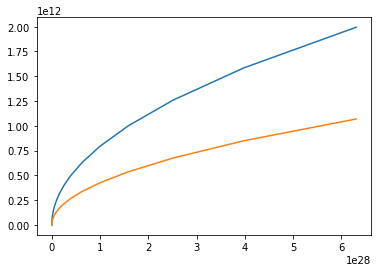

In [4]:
LiquidwaterTempLower = 273.15 #Kelvin
logLarray = np.arange(15,29,0.2)
xs = 10**logLarray
# xs =  [0.0005*Lsun,0.055*Lsun , Lsun, 10*Lsun]
Ds = []
for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(LiquidwaterTempLower**4)*pi*sigma))
    Ds.append(D)
plt.plot(xs, Ds)   
LiquidwaterTempUpper = 373.15 #Kelvin
Ds = []
for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(LiquidwaterTempUpper**4)*pi*sigma))
    Ds.append(D)
plt.plot(xs, Ds) 

201929188299879.97


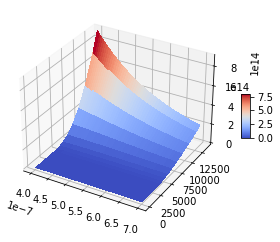

In [5]:
TemperatureofPlanet = 300 #Kelvin
Ds = []
Rs = []
Ts = []
all_Plancks = []
IntegralofIntensity1 = []
FluxPARArray = []

for Lstar in xs:
    D = np.sqrt((Lstar)/(16*(TemperatureofPlanet**4)*pi*sigma))
    Ds.append(D)
    Mstar = Msun*((Lstar/Lsun)**(1/3.5))
    if Mstar<Msun:
        Rstar = Rsun*(Mstar/Msun)**(0.8)
    else:
        Rstar = Rsun*(Mstar/Msun)**(0.57)
    Rs.append(Rstar)
    Tstar = (Lstar/(4*pi*(Rstar**2)*sigma))**(1/4)
    Ts.append(Tstar)
    def Planck(lmbda1):
        return ((2*h*c**2)/lmbda1**5)*(1/(np.exp(h*c/(k*Tstar*lmbda1))-1))
    plancks = []
    for lmbda in lmbda1:
        planck = Planck(lmbda)
        plancks.append(planck)
    IntegratedIntensity = 0
    #as integration will have one single value we will want one integration per Lstar
    for n in range(1, len(lmbda1)):
        dlmbda = lmbda1[n] - lmbda1[n-1]
        IntegratedIntensity = IntegratedIntensity + plancks[n]*dlmbda
    all_Plancks.append(plancks)
    IntegralofIntensity1.append(IntegratedIntensity)
    def PARLuminosity(IntegratedIntensity):
        return 4*(pi**2)*(Rstar**2)*IntegratedIntensity
    FluxPAR = (PARLuminosity(IntegratedIntensity))/(4*pi*D**2)
    FluxPARArray.append(FluxPAR)
print(all_Plancks[-1][-1])
#Because we substitute the values in the equation, we put the linspace part inside the x-axis
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(lmbda1, Ts)
surf = ax.plot_surface(X, Y, np.array(all_Plancks), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.2, aspect=5)
plt.show()

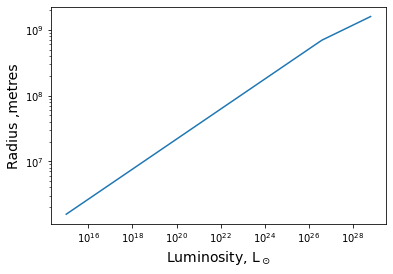

In [6]:
plt.plot(xs, Rs)
plt.xlabel(r"Luminosity, L$_\odot$", fontsize=14)
plt.ylabel('Radius ,metres',fontsize=14)
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Temperature in Kelvin')

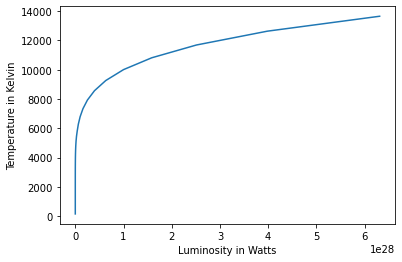

In [7]:
plt.plot(xs, Ts)
plt.xlabel('Luminosity in Watts')
plt.ylabel('Temperature in Kelvin')

Text(0, 0.5, 'Intensity')

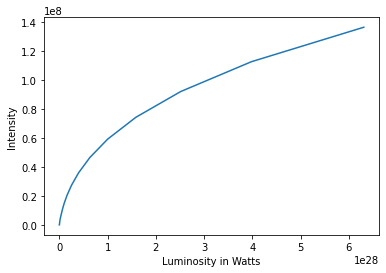

In [8]:
plt.plot(xs, IntegralofIntensity1) 
plt.xlabel('Luminosity in Watts')
plt.ylabel('Intensity')

In [9]:
print(PARLuminosity(IntegratedIntensity))   

1.3726798246975535e+28


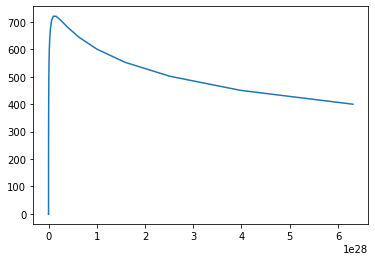

In [10]:
#xs is our Lstar
plt.plot(xs, FluxPARArray)
plt.xlabel('Luminosity in Watts')
plt.ylabel('Flux in Watts per metre squared')